# Brooks Tawil
# ECE: 445 Machine Learning for Engineers
## Mini Jupyter Exercise 5

### Wine Dataset

In this exercise, we will use the Wine dataset from UCI Machine Learning Repository. This is a three-class
dataset comprising 178 data samples, with each sample described by a total of 13 (integer- or real-valued)
attributes (i.e., each data sample is 13-dimensional). The three class labels of 0, 1, and 2 correspond to three
different cultivars that gave rise to the wines included in the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)

### Standardization of Data

In an earlier exercise (Exercise #2), we discussed the importance of centering of data for feature learning
and extraction using principal component analysis (PCA). In many datasets, especially those in which a
sample is given by attributes (raw features) that have different scaling, it is also important to both center and
normalize the data before feature learning using PCA. (Refer to “Scaling the Variables” within Sec. 10.2.3 of
“An Introduction to Statistical Learning” for more discussion on this topic.) In this exercise, we will focus on
normalization that makes the (empirical) variance of each attribute unity. Data that has both been centered
and normalized to have zero mean and unit variance at the attribute (raw feature) level is often referred to
as standardized data.

1. Center the wine dataset so that each attribute has zero (empirical) mean.

In [2]:
mean = samples.mean(0) 
centeredSamples = np.zeros((len(samples), len(samples[0])))

# For each sample, subtract the mean for the sample to center it
for i in range(len(samples)):
    centeredSamples[i] = samples[i] - mean
# Transpose the data so that variables are column-wise    
transposeSamples = centeredSamples.T
# Samples now have zero-empirical mean

2. Compute two-dimensional PCA features of the centered wine dataset.

In [3]:
centeredData = transposeSamples

# Perform PCA as before for n=2
U,S,V = np.linalg.svd(centeredData)
topTwoU = U[:,:2]
topTwoS = np.diag(S[:2])
topTwo = np.matmul(topTwoU, topTwoS)

# Normalize the PCs
for i in range(2):
    topTwo[:,i] = np.divide(topTwo[:,i], np.linalg.norm(topTwo[:,i])) 
reducedSamples = np.matmul(topTwo.T, centeredData).T

• Display the two-dimensional features of wine data samples as points on a two-dimensional scatter
plot. Display all points corresponding to: (i) label ‘0’ as red squares, (ii) label ‘1’ as green triangles,
and (iii) label ‘2’ as blue circles.

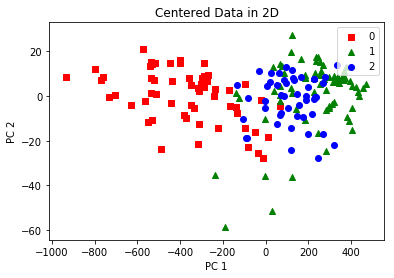

In [4]:
# Get the labels
# Using the now 2D data, we can plot it using matplotlib
zeroData = []
oneData = []
twoData = []

# Separate into sets
for i in range(len(labels)):
    if(labels[i] == 0):
        zeroData.append(reducedSamples[i])
    elif(labels[i] == 1):
        oneData.append(reducedSamples[i])
    else:
        twoData.append(reducedSamples[i])

# Plot
plt.figure()
for dataPoint in zeroData:
    zeroPoint = plt.scatter(dataPoint[0], dataPoint[1], c="red", marker="s")
for dataPoint in oneData:
    onePoint = plt.scatter(dataPoint[0], dataPoint[1], c="green", marker="^")
for dataPoint in twoData:
    twoPoint = plt.scatter(dataPoint[0], dataPoint[1], c="blue", marker="o") 
plt.legend((zeroPoint, onePoint, twoPoint), ("0", "1", "2"), loc='upper right', ncol=1)
plt.title("Centered Data in 2D")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.plot()
plt.show()

3. Normalize the centered wine dataset so that each attribute also has unit (empirical) variance.

In [5]:
centeredNormedSamples = np.zeros((len(samples), len(samples[0])))

for i in range(len(samples[0])):
    centeredNormedSamples[:,i] = np.divide(centeredSamples[:,i], np.linalg.norm(centeredSamples[:,i]))

4. Compute two-dimensional PCA features of the standardized (centered and normalized) wine dataset.

In [6]:
# Transpose the data so that variables are column-wise    
centeredNormedData = centeredNormedSamples.T

# Perform PCA as before for n=2
U,S,V = np.linalg.svd(centeredNormedData)
topTwoU = U[:,:2]
topTwoS = np.diag(S[:2])
topTwo = np.matmul(topTwoU, topTwoS)

# Normalize the PCs
for i in range(2):
    topTwo[:,i] = np.divide(topTwo[:,i], np.linalg.norm(topTwo[:,i])) 
reducedNormSamples = np.matmul(topTwo.T, centeredNormedData).T

• Display the two-dimensional features of standardized wine data samples as points on a twodimensional
scatter plot. Display all points corresponding to: (i) label ‘0’ as red squares, (ii) label
‘1’ as green triangles, and (iii) label ‘2’ as blue circles.

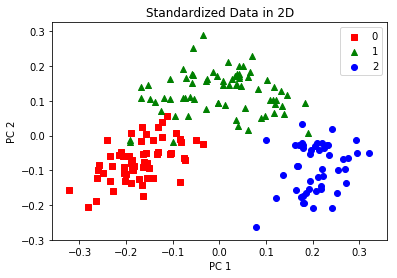

In [7]:
# Get the labels
# Using the now 2D data, we can plot it using matplotlib
zeroData = []
oneData = []
twoData = []

# Separate into sets
for i in range(len(labels)):
    if(labels[i] == 0):
        zeroData.append(reducedNormSamples[i])
    elif(labels[i] == 1):
        oneData.append(reducedNormSamples[i])
    else:
        twoData.append(reducedNormSamples[i])

# Plot the points in each set, use last one for the legend
plt.figure()
for dataPoint in zeroData:
    zeroPoint = plt.scatter(dataPoint[0], dataPoint[1], c="red", marker="s")
for dataPoint in oneData:
    onePoint = plt.scatter(dataPoint[0], dataPoint[1], c="green", marker="^")
for dataPoint in twoData:
    twoPoint = plt.scatter(dataPoint[0], dataPoint[1], c="blue", marker="o")
    
plt.legend((zeroPoint, onePoint, twoPoint), ("0", "1", "2"), loc='upper right', ncol=1)
plt.title("Standardized Data in 2D")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.plot()
plt.show()

It is pretty clear that in the standardized data is much easier to classify than the non-standardized data. This is because of the greater separation of the three classes, and while the standardized data is not perfectly separable using a linear boundary, it is much better than the data that is not standardized.

### Naive Bayes Classification

1. Build a three-class naive Bayes classifier that takes as input two-dimensional data and assumes each feature of the data to be conditionally Gaussian (i.e., Gaussian naive Bayes). You should assume that all classes are equally likely and that the class labels take values in the set {0, 1, 2}, as in the wine dataset.


In [8]:
from sklearn.naive_bayes import GaussianNB
import math

# Helper function for calculating normal distribution
def normPDF(x, mean, var):
    return (1 / math.sqrt(2 * math.pi * var) * math.exp(-(x-mean)**2 / (2 * var)))

class NBClassifier:
    
    def __init__(self, data, labels, priors):
        self.data = data.shape[1]
        self.priors = priors
        self.classes = len(priors)
        # We need a set of means and variances for each class and for each of the features
        self.means = np.zeros((self.classes, self.data))
        self.variances = np.zeros((self.classes, self.data))
        # Put each of the data points into a respective list based on label 1,2,3
        for i in range(self.classes):
            classData = data[np.where(labels == i)]
            self.means[i] = np.mean(classData, axis = 0)
            self.variances[i] = np.var(classData, axis = 0)
    
    def classify(self, point):
        # init the probabilities to 1
        probList = [1] * len(self.priors)
        for i in range(self.classes):
            for x, mean, var in zip(point, self.means[i], self.variances[i]):
                probList[i] *= normPDF(x, mean, var)
        return np.argmax(probList)


With the Naive Bayes Classifier constructed, we still need to have the method of cross validation using K-folds.

2. Use Gaussian naive Bayes classifier for classification of the wine dataset using K-fold cross validation with K = 5 as follows:

- Case I: Perform classification using your implementation of Gaussian naive Bayes classifier and two-dimensional PCA features of centered data only.
- Case II: Perform classification using your implementation of Gaussian naive Bayes classifier and two-dimensional PCA features of standardized data.
- Case III: Perform classification using sklearn’s implementation of Gaussian naive Bayes classifier (sklearn.naive_bayes.GaussianNB) and two-dimensional PCA features of standardized data.

In [9]:
# Cross Validation has many aspects as discussed in class.
# Points need to be ordered randomly and shuffled from the input, and then folded k times
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
k = 5
numClasses = 3
priors = []
# Problem states to assume equal likelyhood for each class, so the prior is 1/#classes
for i in range(numClasses):
    priors.append([1/numClasses])
    
# We can work with the indices and shuffle those to access without changing order of original data
indices = np.arange(len(labels))
np.random.shuffle(indices)
folds = np.array_split(indices, k)
# 'folds' now holds the indices to be used in a k-folds split fashion

# This matrix will hold the runs for the three situations listed above
# We can expect the best answer from the use of sklearn, in the final row
accuracies = np.zeros((3, k))

# This loop uses the classifier class created above
for counter, data in enumerate([reducedSamples, reducedNormSamples]):
    for i in range(k):
        # Only one fold is used for the testing and removed from data set, rest is used for training
        testingSet = data[folds[i],:]
        trainingSet = np.delete(data, folds[i], axis = 0)
        trainingLabels = np.delete(labels, folds[i])
        naiveBayes = NBClassifier(trainingSet, trainingLabels, priors)
        
        # Misclassifications
        errors = 0
        for dataPoint, label in zip(testingSet, labels[folds[i]]):
            if naiveBayes.classify(dataPoint) != label:
                errors += 1
        accuracies[counter, i] = ((len(folds[i]) - errors) / len(folds[i]))

# Using sklearn we can also do the above operations on the standardized dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
for i in range(k):
    testingSet = reducedNormSamples[folds[i],:]
    trainingSet = np.delete(reducedNormSamples, folds[i], axis=0)
    trainingLabels = np.delete(labels, folds[i])  
    naiveBayesSKLearn = GaussianNB(priors = priors)
    naiveBayesSKLearn.fit(trainingSet, trainingLabels)
    
    # Misclassifications
    errors = 0
    guesses = naiveBayesSKLearn.predict(testingSet)
    for dataPoint, label in zip(guesses, labels[folds[i]]):
        if dataPoint != label:
            errors += 1
    accuracies[2, i] = (len(folds[i]) - errors) / len(folds[i])

# Calculate the mean and variances of the accuracies for each of the 3 cases
finalMeans = np.mean(accuracies, axis=1)
finalVars = np.var(accuracies, axis=1)
    
print ('Stats for solely centered data:')
print ('Accuracies: \t' + str(accuracies[0]))
print ('Mean: \t\t' + str(finalMeans[0]))
print ('Variance: \t' + str(finalVars[0]))
print ()
print ('Stats for standarized (centered an normalize) data:')
print ('Accuracies: \t' + str(accuracies[1]))
print ('Mean: \t\t' + str(finalMeans[1]))
print ('Variance: \t' + str(finalVars[1]))
print ()
print ('Stats for standarized (centered an normalize) data using sklearn:')
print ('Accuracies: \t' + str(accuracies[2]))
print ('Mean: \t\t' + str(finalMeans[2]))
print ('Variance: \t' + str(finalVars[2]))


Stats for solely centered data:
Accuracies: 	[0.75       0.75       0.77777778 0.85714286 0.71428571]
Mean: 		0.7698412698412699
Variance: 	0.0023116654069035006

Stats for standarized (centered an normalize) data:
Accuracies: 	[0.97222222 0.94444444 0.97222222 0.97142857 0.97142857]
Mean: 		0.9663492063492063
Variance: 	0.00012008062484252973

Stats for standarized (centered an normalize) data using sklearn:
Accuracies: 	[0.97222222 0.94444444 0.97222222 0.97142857 0.97142857]
Mean: 		0.9663492063492063
Variance: 	0.00012008062484252973


3. Compare and contrast the mean and variance of the classification accuracy of the classifiers in Case I, Case II, and Case III.

It is clear that Case 1 has a lower mean accuracy than Cases 2 and 3. Additionally, the variance of Case 1 is nearly 10x larger than those of Case 2 and Case 3. The lower average accuracy can be attributed to the lack of standardization of the features, the size of which factors in when not normalized. We really only want the variance between values to effect the classification, which is what normalizing all of the values does for us.